In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
import os

In [2]:
def plot_TMA():
    
    TMA_lon=[9.59556, 11.7944, 11.8494, 12.0989, 12.3611, 12.3394, 12.3417, 12.2917, 11.8292, 11.6958, 11.0722, 10.95, 10.5583, 10.1, 9.59556];

    TMA_lat=[59.7097, 59.3667, 59.8333, 59.8906, 60.2236, 60.4039, 60.5, 60.7125, 60.875, 60.7972, 60.8778, 60.9389, 60.925, 60.7292, 59.7097];

    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
    central_longitude = min(TMA_lon) + (max(TMA_lon)-min(TMA_lon))/2
    print(central_latitude, central_longitude)
    #print(central_latitude)
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    #ax.set_aspect(mercator_aspect_ratio)

    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plt.plot(TMA_lon, TMA_lat, color="blue")

60.1528 10.97833


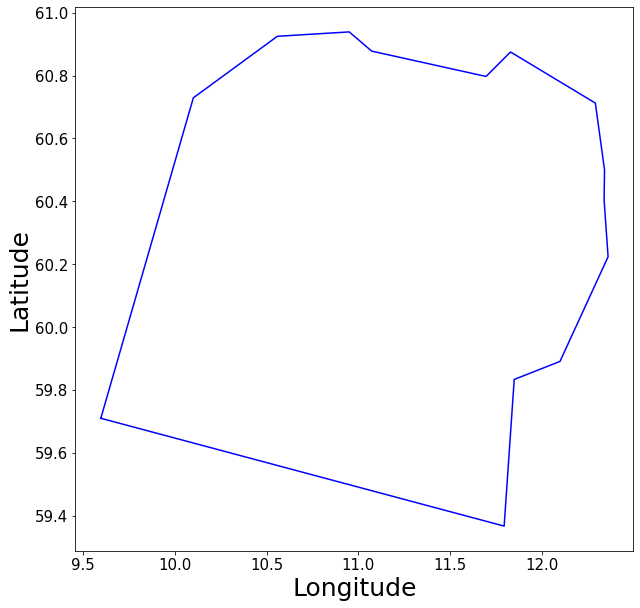

In [3]:
plot_TMA()

In [4]:
 def plot_horizontal_profile(df, title):
    linewidth=1
    plot_TMA()
    
    if df.empty:
        return
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        #print(flight_id)
        
        lons = flight_df["lon"]
        lats = flight_df["lat"]
        
        plt.plot(lons, lats, color='k', linewidth=linewidth)
        
    plt.title(title)

In [5]:
def plot_vertical_profile(df, linewidth=1):
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['altitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

In [6]:
def plot_raw_vertical_profile(df, linewidth=1):
           
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['rawAltitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [9]:
filename = "../Data/ENGM/2019/osn_ENGM_states_aroundTMA_2019_fixed_lat_lon/osn_departure_ENGM_states_aroundTMA_fixed_lat_lon_2019_10_week3.csv"
states_raw_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
states_raw_df.set_index(['flightId', 'sequence'], inplace = True)
print(states_raw_df.head(1))

                         timestamp        lat        lon  rawAltitude  \
flightId      sequence                                                  
191015AFL2175 0         1571138160  60.219727  11.251705         1303   

                        altitude  velocity  beginDate  endDate  
flightId      sequence                                          
191015AFL2175 0              114    191015     191015      NaN  


60.1528 10.97833


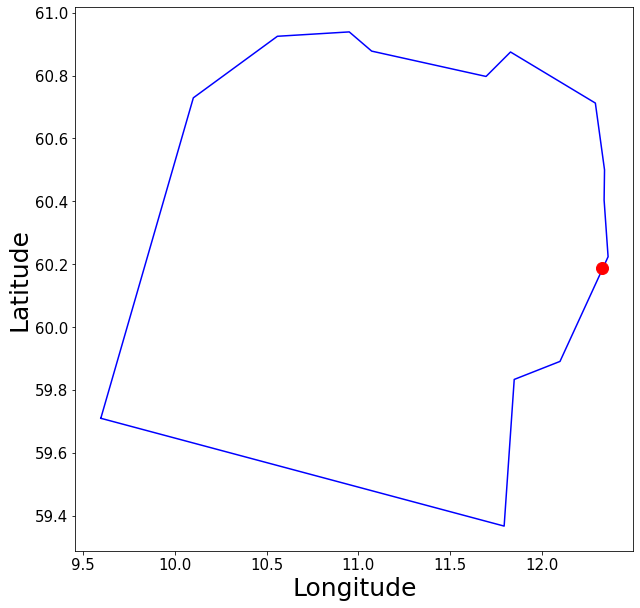

In [17]:
plot_TMA()
x = states_raw_df['lon'][0]
y = states_raw_df['lat'][0]
x = 12.328132
y = 60.188786
plt.plot(x, y, color="red", marker='o', markersize=12)